In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import random 
import statistics as st
import scipy
from scipy.optimize import minimize 

Posterior = normalize(likelihood * prior)

Prior = usaremos Jeffrey's => Pr(Theta)= 1/Theta

##Primer intento (FALLIDO)

In [ ]:
#Pra la recta probaremos con la recta y=2*x+1
#def Function(x, ):
#  PFunc = m*x + b


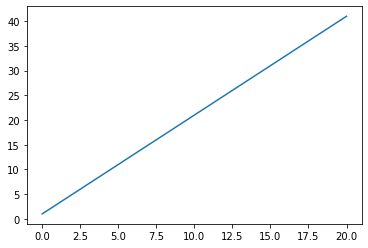

In [ ]:
#Recta y= 2*x + 1
def RectaParam(Theta):
  #print(Theta[0])
  xparam = np.linspace(0,20,100)
  yparam = Theta[0] * x + Theta[1]
  #print(len(y))
  return xparam ,yparam

def Recta():
  x = np.linspace(0,20,100)
  y = 2 * x + 1
  return x, y
x,y = Recta()
#print(y)
plt.plot(x,y)
plt.show()
stdTheo = st.stdev(y)
mu = np.mean(y)
#print(mu)

In [ ]:
import math
def Likelihood(x, y, mu , Theta): #Para distribucion gaussiana
  #Creo que desvestandar lo proponemos
  #Para cada punto
  #print(Theta)
  xMod , yMod = RectaParam(Theta)
  llh=1
  for i in range(len(x)):
    dat= [y[i], yMod[i]]
    stdTheo = st.stdev(dat)
    numerator = np.exp((-(y[i]-mu)**2)/(2*stdTheo**2))
    #print(numerator)
    denominator = stdTheo * np.sqrt(2*np.pi)
    div = numerator/denominator
    #print(div)
    llh *= div
  likelihood = llh
  return likelihood
#llk= Likelihood(x,y,mu )
#print(llk)

In [ ]:
def Prior(Theta):
  prior = 1/Theta[0] * 1/Theta[1]
  return prior

In [ ]:
def P_acc(Theta, Thetast, Theta_trial, mu):
  likelihood = Likelihood(x, y ,mu,Thetast)
  likelihood_trial = Likelihood(x,y,mu,Theta_trial)
  prior = Prior(Theta)
  prior_trial = Prior(Theta_trial)
  PTheta = likelihood * prior
  PTheta_trial = likelihood_trial * prior_trial
  Pacc = min(1, PTheta_trial / PTheta)
  return(Pacc)


In [ ]:
#def MatrixCov():
#  matcov= np.cov(x,y)


In [ ]:
def MetropolisHastings(N, y, x):
  Theta1 = [0.1]
  Theta2 = [0.1]
  Theta=[0.1, 0.1]
  step = 0.5
  ThetaStart = Theta
  for n in range(N):
    ThetaTrial =[]
    for j in range(2):
      TT = np.random.normal(loc= ThetaStart[j], scale = 0.1)
      ThetaTrial.append(TT)
    Pacc = P_acc(Theta, ThetaStart, ThetaTrial, mu)
    u = random.uniform(0,1)
    print("Pacc is" + str(Pacc))
    if Pacc > u:
      for c in range(2):
        Thetai = ThetaTrial[c]
        Theta.append(Thetai)
        if c== 0:
          Theta1.append(Thetai)
        if c==1:
          Theta2.append(Thetai)
        print("Thetatrial is= " + str(ThetaTrial))
        print("Theta start is" + str(ThetaStart))
        print("Theta is " + str(Theta))
    else:
      for c in range(2):
        Thetai = ThetaStart[c]
        print(Thetai)
        Theta.append(Thetai)
        if c== 0:
          Theta1.append(Thetai)
        if c==1:
          Theta2.append(Thetai)
      #Thetai = ThetaStart
      #Theta.append(Thetai)
    for s in range(len(ThetaStart)):
      ThetaStart[s] += step
    
  return len(Theta)

#print(Theta)


In [ ]:
Teoria = Recta()
#modelo = RectaParam()
#print(modelo)

In [ ]:
Paramteters= MetropolisHastings(N= 2, y= Teoria[1], x=Teoria[0])
print(Paramteters)

Pacc is1
Thetatrial is= [0.10212179829988136, -0.010544102113784176]
Theta start is[0.1, 0.1, 0.10212179829988136]
Theta is [0.1, 0.1, 0.10212179829988136]
Thetatrial is= [0.10212179829988136, -0.010544102113784176]
Theta start is[0.1, 0.1, 0.10212179829988136, -0.010544102113784176]
Theta is [0.1, 0.1, 0.10212179829988136, -0.010544102113784176]
Pacc is1
Thetatrial is= [0.5471975413263768, 0.6559133199741076]
Theta start is[0.6, 0.6, 0.6021217982998813, 0.4894558978862158, 0.5471975413263768]
Theta is [0.6, 0.6, 0.6021217982998813, 0.4894558978862158, 0.5471975413263768]
Thetatrial is= [0.5471975413263768, 0.6559133199741076]
Theta start is[0.6, 0.6, 0.6021217982998813, 0.4894558978862158, 0.5471975413263768, 0.6559133199741076]
Theta is [0.6, 0.6, 0.6021217982998813, 0.4894558978862158, 0.5471975413263768, 0.6559133199741076]
6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


## Segundo Intento

In [ ]:
#
#Recta y= 2*x + 1
def RectaModel(Theta):
  #print(Theta[0])
  xparam = np.linspace(0,20,100)
  yparam = Theta[0] * x + Theta[1]
  #print(len(y))
  return xparam ,yparam

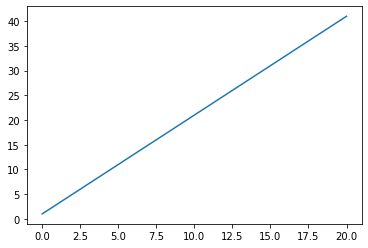

In [ ]:
def Recta():
  x = np.linspace(0,20,100)
  y = 2 * x + 1
  return x, y

  
x,y = Recta()
#print(y)
plt.plot(x,y)
plt.show()
stdTheo = st.stdev(y)
mu = np.mean(y)
#print(mu)

In [ ]:
#ln(m/n) = ln(m) – ln(n)
def Likelihood(y,mu, Theta):
  sigma =[]
  likelihood = 0
  xmod, ymod = RectaModel(Theta) #N
  for i in range(len(x)):
    sig = 0.2 #Asumiendo desviacion estandar
    sigma.append(sig)
  for i in range(len(sigma)):  #Applying ln
    numerator = ((-(y[i]-ymod[i])**2)/(2*sigma[i]**2))
    denominator = np.log(sigma[i] * np.sqrt(2*np.pi))
    lik = (numerator-denominator)
    likelihood += lik

  return likelihood

In [ ]:
def Prior(Theta):
  prior = Theta[0]/Theta[1]
  return prior

In [ ]:
def AccProb(ThetaTrial, Theta,y,mu):
  likelihoodTrial = Likelihood(y,mu, ThetaTrial)
  priorTrial = Prior(ThetaTrial)
  likelihoodTheta = Likelihood(y,mu, Theta)
  priorTheta = Prior(Theta)
  P_Trial=likelihoodTrial * priorTrial
  P_Theta=likelihoodTheta * priorTheta
  Pacc=(min(1,P_Trial/P_Theta))
  return Pacc

In [ ]:
def MetropolisHastings2(N): #Lo hago para 2 parametros por que la recta tiene la m y la b y es lo primero que intentaremos
  Theta = [0.1,0.1]
  Theta1 =[0.1]
  Theta2=[0.1]
  for n in range(N):
    ThetaStart = Theta
    ThetaTrial =[0,0]  
    ThetaTrial[0] = np.random.normal(loc=Theta[0], scale=0.2)
    ThetaTrial[1] = np.random.normal(loc=Theta[1], scale=0.2)
    Pacc = AccProb(ThetaTrial, Theta,y,mu)
    u = np.random.uniform(0,1)
    if Pacc > u:
      Theta[0]=ThetaTrial[0]
      Theta[1]=ThetaTrial[1]
      Theta1.append(Theta[0])
      Theta2.append(Theta[1])
    else:
      Theta[0]=Theta[0]
      Theta[1]=Theta[1]
      Theta1.append(Theta[0])
      Theta2.append(Theta[1])
  return Theta, Theta1, Theta2

    

In [ ]:
#np.random.normal(loc=0, scale=0.2)

#np.random.uniform(0, 1)
#Theta, Theta1 , Theta2 = MetropolisHastings2(1000)
#print(Theta1)

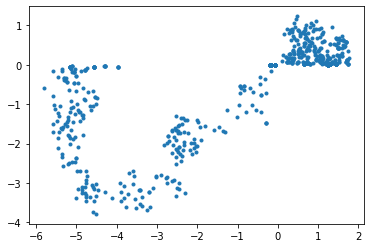

In [ ]:
Theta, Theta1 , Theta2 = MetropolisHastings2(1000)
plt.plot(Theta1, Theta2, ".")
plt.show()

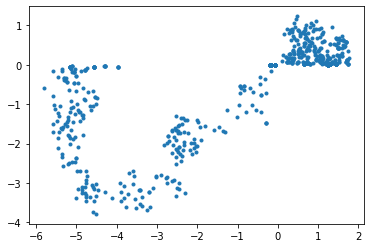

In [ ]:
#Me quedaré con estos valores asi que ya no correremos esta linea

#Plot para ver donde converge (se juntan todos los puntos)
ThetaRecta = Theta
Theta1Recta=Theta1
Theta2Recta =Theta2
plt.plot(Theta1, Theta2, ".")
plt.show()
#Despues de correr varias veces el código, Tenemos esta grafica que se aglomera en theta1 = m= 2 y Theta2 = b = 1

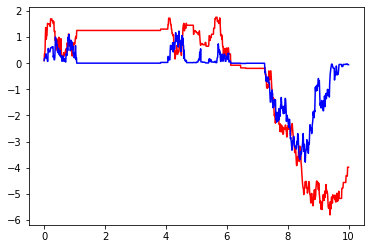

In [ ]:
#TracePlot
#Ya no pude agregarle los labels a las graficas debido a que si corría otra vez el algoritmo, los valores iban a cambiar.
r = np.linspace(0, 10, 1001)
plt.plot(r, Theta1Recta, color = "r", label="Traceplot para m")
plt.plot(r, Theta2Recta, color = "b", label= "Traceplot para b")
plt.show()

## Para las supernovas

In [5]:
ruta = '/content/drive/MyDrive/CosmologiaProyectoFinal/'
nombreArchivo = 'SCPUnion_mu_vs_z.txt'
data = np.genfromtxt(ruta + nombreArchivo, dtype= "str").T
data = list(data)
#print(data)
data.pop(0)
#print(data)
data = np.array(data, dtype=float)
#print(data)

In [6]:
z= data[0]
muSN = data[1]
sigmaSN = data[2]

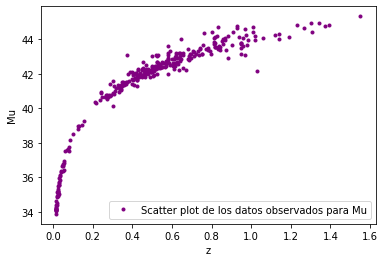

In [44]:
plt.plot(z,muSN, ".", color = "purple", label = "Scatter plot de los datos observados para Mu")
plt.xlabel("z")
plt.ylabel("Mu")
plt.legend()
plt.show()

In [8]:
#Formula
#Mu_dL = 5 * math.log10((i/3.08*10**19)+25) donde i = DL


In [ ]:
!pip install CosmoloPy

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
import cosmolopy.distance as cd
import scipy


In [13]:
#Parametros
H0 = 67.36
Ob0=0.02237/(H0/100)**2
OLambda=0.6847 #Valor establecido
Tcmb0=2.7255 #Kelvin
Om0 = 1. - OLambda
print(Om0)

0.3153


In [14]:
cosmo = {'omega_M_0' : Om0, 'omega_lambda_0' : OLambda,'h' : H0/100} #omega_k_0: 0.0
cosmo = cd.set_omega_k_0(cosmo)
cosmoM_L = [Om0, OLambda]
print(cosmoM_L)

[0.3153, 0.6847]


In [15]:
zmodel = np.linspace(0.01,2,100,endpoint = False, retstep = False)
#print(zmodel)

In [16]:
def Lum_distance(z, cosmoM_L):
  L_Distance = []
  cosmo = {'omega_M_0' : cosmoM_L[0], 'omega_lambda_0' : cosmoM_L[1],'h' : H0/100} #omega_k_0: 0.0
  cosmo = cd.set_omega_k_0(cosmo)
  for i in z: 
    L_Distance.append(cd.luminosity_distance(i, **cosmo))
  return L_Distance

In [17]:
def ModuleDistance(LumDist):
  Mu=[]
  for i in LumDist:
    Mu.append(5 * np. log10(i) + 25) # L_Distance / Mpc
  return Mu

In [18]:
DL_Model = Lum_distance(zmodel, cosmoM_L)
DL_Obs = Lum_distance(z, cosmoM_L)
MuD_Model = ModuleDistance(DL_Model)
print(MuD_Model)

[33.25854908509025, 35.66893026557564, 36.80781584401997, 37.56803276014968, 38.14274729296005, 38.60678699775626, 38.9970984115717, 39.33466748648404, 39.63257047965723, 39.89951220447502, 40.1415831688825, 40.3632137666215, 40.56772918989373, 40.75769016966543, 40.93511167332052, 41.10160853004922, 41.25849545949687, 41.40685763372125, 41.54760161425417, 41.68149287230267, 41.80918392316953, 41.93123576000781, 42.04813441638382, 42.160303929579385, 42.268116605139724, 42.37190123076157, 42.47194971296281, 42.5685224871268, 42.661852963800584, 42.752151210631155, 42.83960702277433, 42.924392500083584, 43.00666422349612, 43.08656510342354, 43.16422595796205, 43.23976686717204, 43.31329834068408, 43.38492232884016, 43.45473310201518, 43.522818018341745, 43.58925819652391, 43.654129107578285, 43.71750109703653, 43.77943984726717, 43.84000678803997, 43.89925946219447, 43.95725185223135, 44.014034672780696, 44.06965563318005, 44.12415967379209, 44.17758917918485, 44.229984170870196, 44.281

In [31]:
def ModuleDistanceModel(z, Theta, Mu):
  cosmo = {'omega_M_0' : Theta[0], 'omega_lambda_0' : Theta[1],'h' : H0/100} #omega_k_0: 0.0
  cosmo = cd.set_omega_k_0(cosmo)
  Lum_Dist =[]
  zNew=[]
  MuNew=[]
  for i in range(len(z)): 
    try:
      Lum_Dist.append(cd.luminosity_distance(z[i], **cosmo))
      MuNew.append(Mu[i])
      zNew.append(z[i])
    except TypeError:
      pass
  MuModel=[]
  for i in Lum_Dist:
    MuModel.append(5 * np. log10(i) + 25) # L_Distance / Mpc
  return MuModel, MuNew, zNew

In [29]:
#ln(m/n) = ln(m) – ln(n)
def Likelihood(y, sigma, Theta):
  likelihood = 0
  ymod , ynew, zNew = ModuleDistanceModel(z,Theta, y) #Volvi a copiar ya que lo hice solo para la recta y no para un caso general (intento1)
  for i in range(len(ymod)):  #Applying ln
    numerator = ((-(ynew[i]-ymod[i])**2)/(2*sigma[i]**2))
    denominator = np.log(sigma[i] * np.sqrt(2*np.pi))
    lik = (numerator-denominator)
    likelihood += lik

  return likelihood

In [21]:
def Prior(Theta):
  prior = Theta[0]/Theta[1]
  return prior

In [22]:
def AccProb(ThetaTrial, Theta, y, sigma): # y = Mu de datos
  likelihoodTrial = Likelihood(y,sigma, ThetaTrial)
  priorTrial = Prior(ThetaTrial)
  likelihoodTheta = Likelihood(y,sigma, Theta)
  priorTheta = Prior(Theta)
  P_Trial=likelihoodTrial * priorTrial
  P_Theta=likelihoodTheta * priorTheta
  Pacc=(min(1,P_Trial/P_Theta))
  return Pacc

In [23]:
def MetropolisHastingsMu(y, N, sigma): #El unico que debia modificar era el likelihood, pero ya copié todo
  Theta = [0.1,0.1]
  Theta1 =[0.1]
  Theta2=[0.1]
  for n in range(N):
    ThetaStart = Theta
    ThetaTrial =[0,0]  
    ThetaTrial[0] = np.random.normal(loc=Theta[0], scale=0.2)
    ThetaTrial[1] = np.random.normal(loc=Theta[1], scale=0.2)
    Pacc = AccProb(ThetaTrial, Theta, y ,sigma)
    u = np.random.uniform(0,1)
    if Pacc > u:
      Theta[0]=ThetaTrial[0]
      Theta[1]=ThetaTrial[1]
      Theta1.append(Theta[0])
      Theta2.append(Theta[1])
    else:
      Theta[0]=Theta[0]
      Theta[1]=Theta[1]
      Theta1.append(Theta[0])
      Theta2.append(Theta[1])
  return Theta, Theta1, Theta2

    

In [24]:
#Valores de los parametros: [0.3153, 0.6847] =[Om, OLambda]
#z= data[0]
#muSN = data[1]
#sigmaSN = data[2]

Como me marcaba error de numero complejo en algunas ocasiones, decidí despreciar esos valores asi como despreciar los valores de los datos que estuvieran en esa posicion (para ese valor de z)

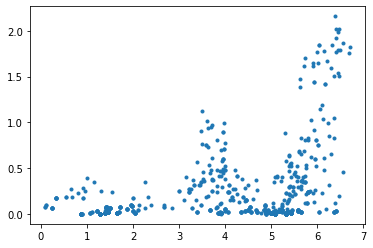

In [36]:
Theta, Theta1 , Theta2 = MetropolisHastingsMu(muSN, 1000, sigmaSN)
plt.plot(Theta1, Theta2, ".")
plt.show()

No logro hacer que mis parametros converjan, ademas de esto, tarda aproximadamente 3 min en correr cada vez para obtener nuevas graficas.

Además, en ocasiones marca un error en Integración.

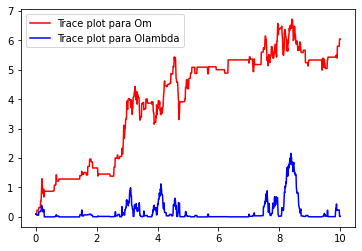

In [42]:
#TracePlot
#Pense que se usaba, pero creo que no : MuModel, MuNew, zNew = ModuleDistanceModel(z, Theta, muSN)
xSN = np.linspace(0, 10, 1001)
plt.plot(xSN, Theta1, color = "r", label= "Trace plot para Om")
plt.plot(xSN, Theta2, color = "b", label= "Trace plot para Olambda")
plt.legend()
plt.show()

In [45]:
#!pip install getdist
##https://getdist.readthedocs.io/en/latest/plots.html#getdist.plots.GetDistPlotter